<a href="https://colab.research.google.com/github/AnthonySanchez150/CECS456-Project/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Description
This data set includes 201 instances of one class and 85 instances of another class. The instances are described by 9 attributes, some of which are linear, and some are nominal.
Tasks:
Predict if the patient has breast cancer or not (binary classification problem)
Instructions/Directions:
1.	Perform exploratory data analysis and feature selection 	
2.	Visualization
            2.1. Plot the variable distribution using box plot, histogram, and provide a summary of your understanding.  
            2.2. Provide an insight on the outcome of correlation matrix   
3.	Perform feature extraction using Principal Component Analysis (PCA). 
4.	Plot the confusion matrix. 
5.	Evaluate the performance metrics of logistic regression, SVM classifier, Naïve Bayes classifier, and Random Forest classifier.  
6.	Plot the relevant graphs, for example ROC, AUC, etc. 
7.	Use Artificial Neural Network (Deep Learning Method) and compare the accuracy with traditional Machine Learning Models. Write down your observations.
Dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer
'

## Breast Cancer Prediction

CECS 456 - Machine Learning

Group #9:
- Phong Cao (Leader)
- Peter Pham
- Jeremy Lin
- Maximillian Gutierrez
- Anthony Sanchez
- John Messina

Due Date: 4-26-23

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Exploratory Data Analysis

In [45]:
dataset = pd.read_csv('breast-cancer.data')
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

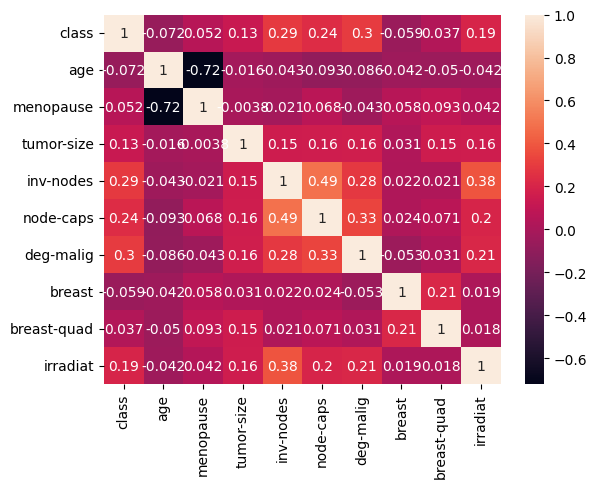

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
dataset['age'] = le.fit_transform(dataset['age'])
dataset['class'] = le.fit_transform(dataset['class'])
dataset['menopause'] = le.fit_transform(dataset['menopause'])
dataset['tumor-size'] = le.fit_transform(dataset['tumor-size'])
dataset['inv-nodes'] = le.fit_transform(dataset['inv-nodes'])
#dataset['deg-malig'] = le.fit_transform(dataset['deg-malig'])
dataset['breast'] = le.fit_transform(dataset['breast'])
dataset['breast-quad'] = le.fit_transform(dataset['breast-quad'])
dataset['irradiat'] = le.fit_transform(dataset['irradiat'])
dataset['node-caps'] = le.fit_transform(dataset['node-caps'])

import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = dataset.corr(numeric_only = False)
sn.heatmap(corr_matrix, annot=True)
plt.show()


In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values="?", strategy="most_frequent")
si.fit(X[:,5:9])
X[:,5:9] = si.transform(X[:,5:9])

le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
#X[:,1] = le.fit_transform(X[:,1])
X[:,2] = le.fit_transform(X[:,2])
X[:,3] = le.fit_transform(X[:,3])
X[:,4] = le.fit_transform(X[:,4])
X[:,6] = le.fit_transform(X[:,6])
X[:,7] = le.fit_transform(X[:,7])
X[:,8] = le.fit_transform(X[:,8])
y = le.fit_transform(y)

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [ ]:
print(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)